In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('store_sales.csv')

In [3]:
df = df.sort_values(by=['store', 'date']).reset_index(drop=True)

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 date       0
store      0
sales      0
promo      0
holiday    0
dtype: int64


In [6]:
df.describe()

,date,store,sales,promo,holiday
count,7300,7300.000000,7300.000000,7300.000000,7300.000000
mean,2022-12-31 12:00:00,5.500000,228.434571,0.202192,0.104110
min,2022-01-01 00:00:00,1.000000,160.710000,0.000000,0.000000
25%,2022-07-02 00:00:00,3.000000,209.217500,0.000000,0.000000
50%,2022-12-31 12:00:00,5.500000,226.795000,0.000000,0.000000
75%,2023-07-02 00:00:00,8.000000,245.590000,0.000000,0.000000
max,2023-12-31 00:00:00,10.000000,340.730000,1.000000,1.000000
std,NaN,2.872478,26.625636,0.401662,0.305424


In [7]:
#Create calendar-based features to get better insights when doing visualizations
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [8]:
#Set a consistent style
sns.set_theme(style="whitegrid", context="notebook", palette="deep")
plt.rcParams.update({
    "figure.figsize": (14, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.titlepad": 15,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "grid.alpha": 0.3,
    "lines.linewidth": 2,
})

C:\Users\ronny\AppData\Local\Temp\ipykernel_8780\2958551249.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('date').resample('M')['sales'].sum().reset_index()


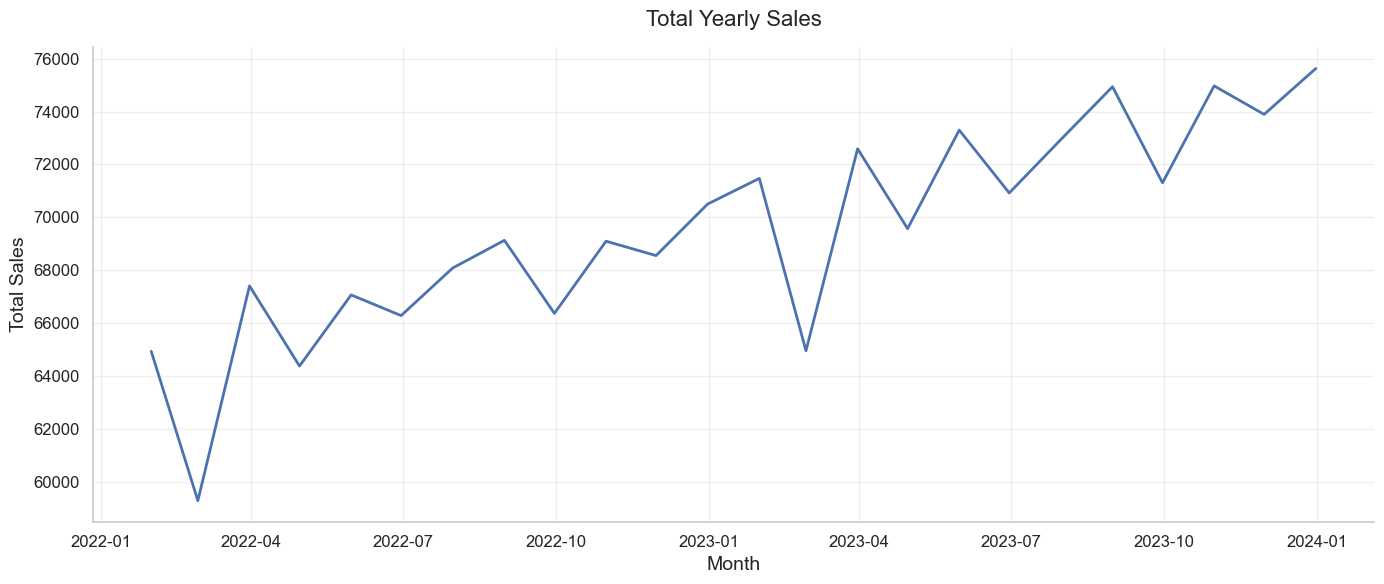

In [9]:
monthly_sales = df.set_index('date').resample('M')['sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='date', y='sales')
plt.title("Total Yearly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(minor=True)
plt.tight_layout()
plt.savefig('Total_yearly_sales.png', dpi=300)
plt.show()


Key Insights
  Upward Trend: Sales steadily increased from early 2022 to late 2023.
  Seasonality: Dips in Feb/March and peaks in March, April, and late 2023 suggest seasonal patterns.
  Year-over-Year Growth: 2023 shows higher and more variable sales than 2022.
  Stable Performance: Overall, sales remain consistently strong without major volatility.

C:\Users\ronny\AppData\Local\Temp\ipykernel_8780\2604496058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dow_avg, x='day_of_week', y='sales', palette='viridis')


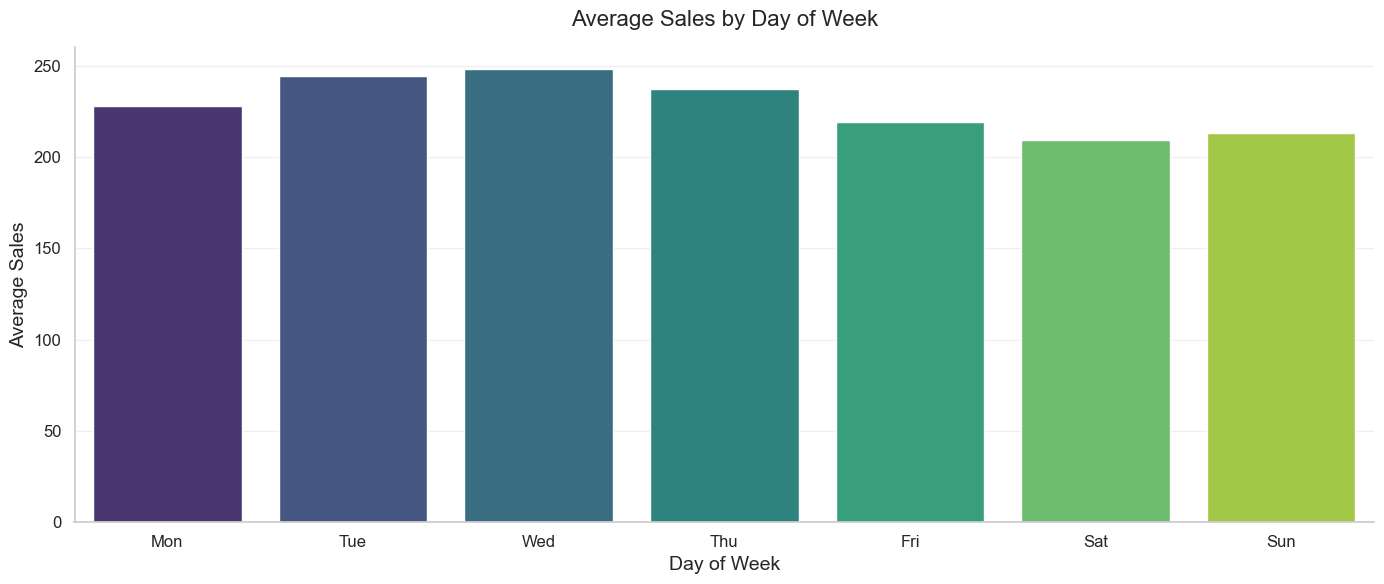

In [10]:
dow_avg = df.groupby('day_of_week')['sales'].mean().reset_index()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure()
sns.barplot(data=dow_avg, x='day_of_week', y='sales', palette='viridis')
plt.xticks(ticks=range(7), labels=dow_labels)
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.savefig('Average Sales by Day of Week.png', dpi=300)
plt.show()

Key Insights
Stable Performance: Overall, sales remain consistently strong without major volatility.

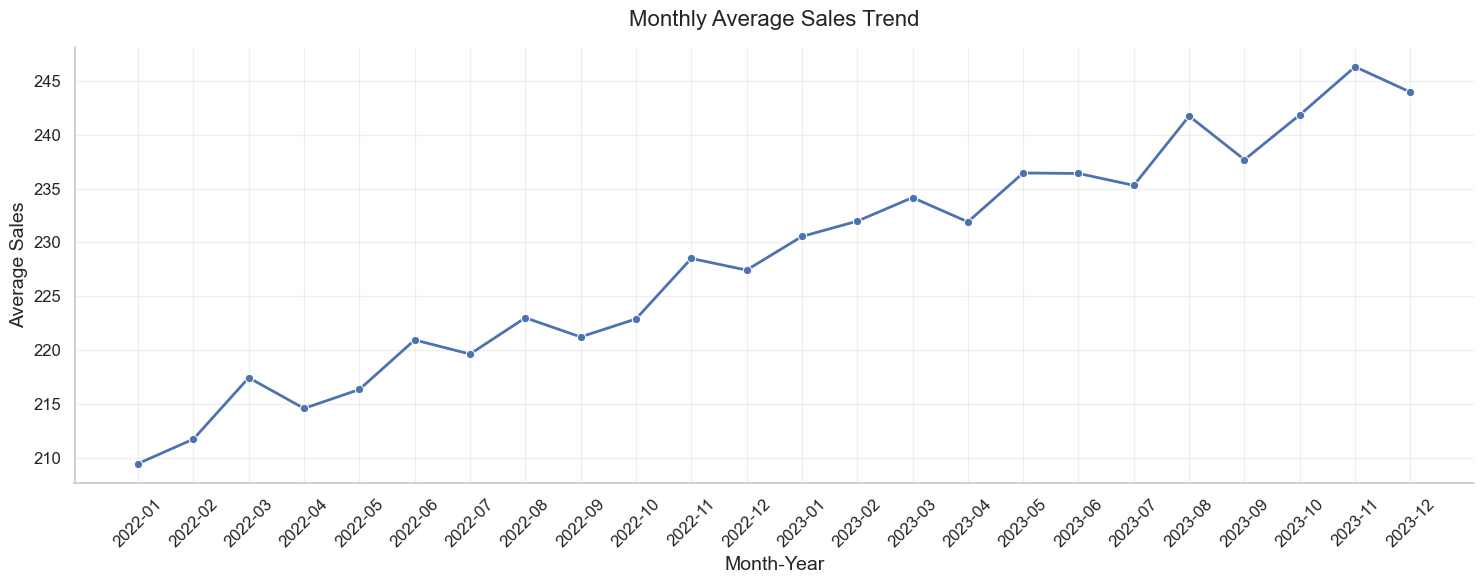

In [11]:
df['month_year'] = df['date'].dt.to_period('M').astype(str)
monthly_avg = df.groupby('month_year')['sales'].mean().reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(data=monthly_avg, x='month_year', y='sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Average Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.savefig('Monthly Average Sales Trend.png', dpi=300)
plt.show()

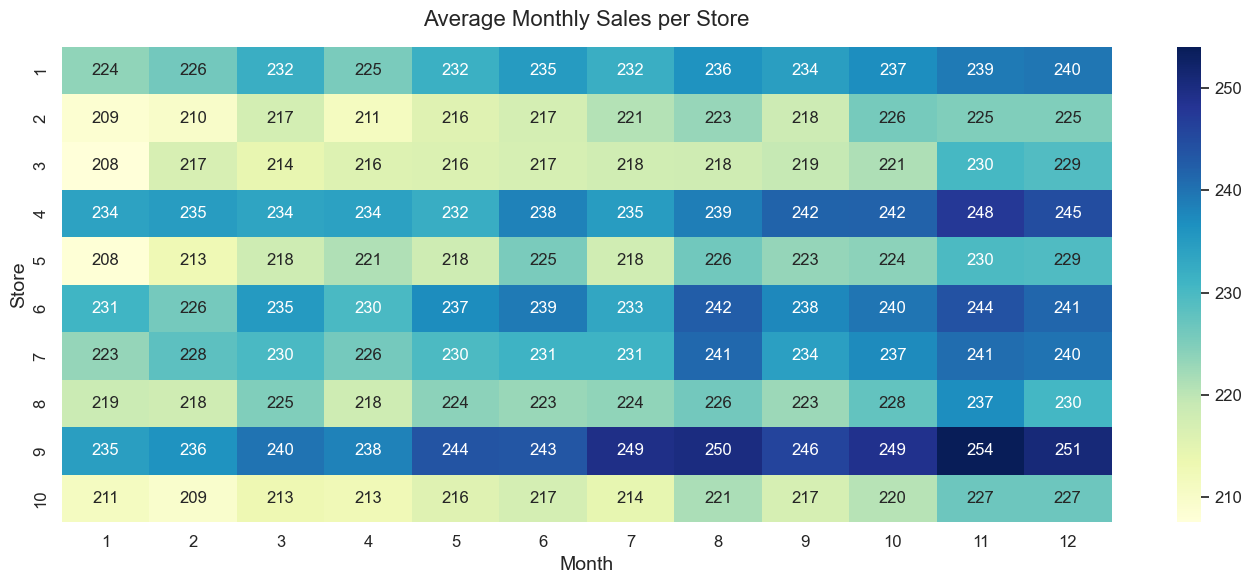

In [12]:
heatmap_data = df.copy()
heatmap_data['month'] = heatmap_data['date'].dt.month
heatmap_data['year'] = heatmap_data['date'].dt.year
pivot = heatmap_data.pivot_table(values='sales', index='store', columns='month', aggfunc='mean')

plt.figure()
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Monthly Sales per Store")
plt.xlabel("Month")
plt.ylabel("Store")
plt.tight_layout()
plt.savefig('Average Monthly Sales per Store.png', dpi=300)
plt.show()

In [18]:
df['store_avg_sales'] = df.groupby('store')['sales'].transform('mean')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['store', 'promo', 'holiday', 'day_of_week', 'month', 'is_weekend', 'store_avg_sales']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2%}")

RMSE: 12.37
R²: 78.76%


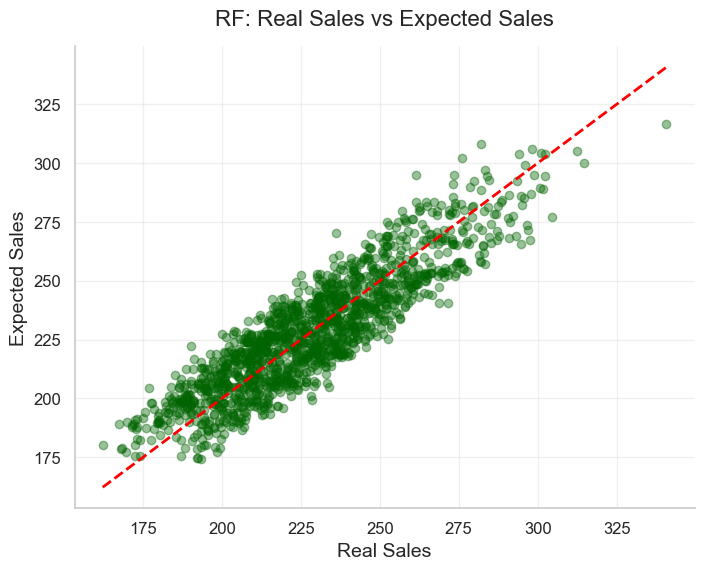

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Real Sales')
plt.ylabel('Expected Sales')
plt.title('RF: Real Sales vs Expected Sales')
plt.grid(True)
plt.show()

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'{(scores.mean()) * 100:.2f}%')

78.00%
